# Feature Selection Method Based on Grey Wolf Optimization for IOT Home Sensors Classification

In [1]:
import random
import time
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import benchmarks

data = pd.read_csv("iot_dataset.csv")
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [3]:
data["Hours"]= data['date'].apply(lambda x : x.split()[1][:2])
data["Minutes"]= data['date'].apply(lambda x : x.split()[1][3:5])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
 7   Hours          20560 non-null  object 
 8   Minutes        20560 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.4+ MB


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Minutes
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1,14,19
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1,14,19
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1,14,21
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1,14,22
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1,14,23


In [4]:
data['Time'] = data['Hours'] + '.' + data['Minutes']
data['Time'] = data['Time'].astype('float64')
data.drop(['date', 'Hours', 'Minutes'], axis = 1, inplace = True)
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Time
0,23.7000,26.272,585.200000,749.200000,0.004764,1,14.19
1,23.7180,26.290,578.400000,760.400000,0.004773,1,14.19
2,23.7300,26.230,572.666667,769.666667,0.004765,1,14.21
3,23.7225,26.125,493.750000,774.750000,0.004744,1,14.22
4,23.7540,26.200,488.600000,779.000000,0.004767,1,14.23


In [5]:
data = data.reindex(columns=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Time', 'Occupancy'])
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Time,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,14.19,1
1,23.7180,26.290,578.400000,760.400000,0.004773,14.19,1
2,23.7300,26.230,572.666667,769.666667,0.004765,14.21,1
3,23.7225,26.125,493.750000,774.750000,0.004744,14.22,1
4,23.7540,26.200,488.600000,779.000000,0.004767,14.23,1


In [6]:
data.shape

(20560, 7)

### Data preprocessing, extraction and splitting

In [7]:
X = data.iloc[:,:6].values
Y = data['Occupancy'].values
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state = 14)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(20560, 6)


### Applying SVM classification without data processing

In [8]:
svcclassifier = SVC(kernel = 'sigmoid', random_state = 40)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
P_SVC = accuracy_score(y_test,y_pred)
print("Accuracy score for SVM:",P_SVC)

Accuracy score for SVM: 0.8860651750972762


In [9]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[5834,  471],
       [ 466, 1453]], dtype=int64)

In [10]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [11]:
# Let's see the sensitivity of our logistic regression model
sens = TP / float(TP+FN)
sens

0.7571651902032308

In [12]:
# Let us calculate specificity
spec = TN / float(TN+FP)
spec

0.9252973830293418

### GWO Optimization algo

In [13]:
def GWO(objf,lb,ub,dim,SearchAgents_no,Max_iter):
    
    # initialize alpha, beta, and delta_pos
    Alpha_pos=np.zeros(dim)
    Alpha_score=float("inf")
    
    Beta_pos=np.zeros(dim)
    Beta_score=float("inf")
    
    Delta_pos=np.zeros(dim)
    Delta_score=float("inf")

    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim
    
    #Initialize the positions of search agents
    Positions = np.zeros((SearchAgents_no, dim))
    for i in range(dim):
        Positions[:, i] = np.random.uniform(0,1, SearchAgents_no) * (ub[i] - lb[i]) + lb[i]
    
    Convergence_curve=np.zeros(Max_iter)

     # Loop counter
    print("GWO is optimizing  \""+objf.__name__+"\"")    

    # Main loop
    for l in range(0,Max_iter):
        for i in range(0,SearchAgents_no):
            
            # Return back the search agents that go beyond the boundaries of the search space
            for j in range(dim):
                Positions[i,j]=np.clip(Positions[i,j], lb[j], ub[j])

            # Calculate objective function for each search agent
            fitness=objf(Positions[i,:])
            
            # Update Alpha, Beta, and Delta
            if fitness<Alpha_score :
                Alpha_score=fitness; # Update alpha
                Alpha_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness<Beta_score ):
                Beta_score=fitness  # Update beta
                Beta_pos=Positions[i,:].copy()
            
            
            if (fitness>Alpha_score and fitness>Beta_score and fitness<Delta_score): 
                Delta_score=fitness # Update delta
                Delta_pos=Positions[i,:].copy()
        
        a=2-l*((2)/Max_iter); # a decreases linearly fron 2 to 0
        
        # Update the Position of search agents including omegas
        for i in range(0,SearchAgents_no):
            for j in range (0,dim):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); # Equation (3.5)-part 1
                X1=Alpha_pos[j]-A1*D_alpha; # Equation (3.6)-part 1
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)
                
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); # Equation (3.5)-part 2
                X2=Beta_pos[j]-A2*D_beta; # Equation (3.6)-part 2       
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); # Equation (3.5)-part 3
                X3=Delta_pos[j]-A3*D_delta; # Equation (3.5)-part 3             
                
                Positions[i,j]=(X1+X2+X3)/3  # Equation (3.7)        
        Convergence_curve[l]=Alpha_score;
    
    print(Positions.shape)
    print("Alpha position=",Alpha_pos);
    print("Beta position=",Beta_pos);
    print("Delta position=",Delta_pos);
    return Alpha_pos,Beta_pos,Delta_pos;


### Setting GWO parameters

In [14]:
iters=100
wolves=5
dimension=6
search_domain=[0,1]
lb=-65.536
ub=65.536
colneeded=[0,1,2,3,4]
modified_data=pd.DataFrame()
for i in colneeded:
    modified_data[data.columns[i]]=data[data.columns[i]].astype(float)
# func_details=benchmarks.getFunctionDetails(0)

for i in range(0,10):
    alpha,beta,delta=GWO(getattr(benchmarks,'F24'),lb,ub,dimension,wolves,iters)

GWO is optimizing  "F24"
(5, 6)
Alpha position= [-0.01705454 -0.01473118  0.01566249 -0.0180977   0.02709403 -0.03646876]
Beta position= [-0.01718464 -0.01448496  0.01590733 -0.01808307  0.02740746 -0.03662624]
Delta position= [-0.01692641 -0.01485766  0.01601138 -0.01791325  0.0275887  -0.03668222]
GWO is optimizing  "F24"
(5, 6)
Alpha position= [-0.0315111   0.03407146  0.04612787 -0.0441553   0.06117889  0.0614384 ]
Beta position= [-0.03186109  0.03395276  0.04598217 -0.04365253  0.0623255   0.06204438]
Delta position= [-0.03182763  0.03462382  0.04645941 -0.04367207  0.06155218  0.06139691]
GWO is optimizing  "F24"
(5, 6)
Alpha position= [-0.00831637  0.0222048   0.02749664  0.00826922  0.04020094 -0.05046251]
Beta position= [-0.00833133  0.02288217  0.02761918  0.00822914  0.04067614 -0.04980117]
Delta position= [-0.00833911  0.02292764  0.02785181  0.00824741  0.04087556 -0.04955723]
GWO is optimizing  "F24"
(5, 6)
Alpha position= [ 0.00619456 -0.0072     -0.00848536 -0.01227011 

In [15]:
##Applying feature selection on the given dataset
##considering alpha as best solution and putting a threshold
threshold=-0.05
index=[]
print("alpha shape =",alpha.shape[0])
modified_daata=pd.DataFrame();
for i in range(1,alpha.shape[0]):
    if(alpha[i]>=threshold):
        modified_daata[data.columns[i]]=data[data.columns[i]].astype(float)
print("The modified data is following")
modified_daata.head()

alpha shape = 6
The modified data is following


,Humidity,Light,CO2,HumidityRatio,Time
0,26.272,585.200000,749.200000,0.004764,14.19
1,26.290,578.400000,760.400000,0.004773,14.19
2,26.230,572.666667,769.666667,0.004765,14.21
3,26.125,493.750000,774.750000,0.004744,14.22
4,26.200,488.600000,779.000000,0.004767,14.23


### Data preprocessing, extraction and splitting

In [16]:
Y = data['Occupancy'].values
X_train, X_test, y_train, y_test = train_test_split(modified_daata, Y, test_size = 0.40, random_state = 14)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[0])
modified_daata.info()

[-0.06900239 -0.61731087 -0.80626614 -0.40005171  1.35983081]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Humidity       20560 non-null  float64
 1   Light          20560 non-null  float64
 2   CO2            20560 non-null  float64
 3   HumidityRatio  20560 non-null  float64
 4   Time           20560 non-null  float64
dtypes: float64(5)
memory usage: 803.2 KB


### Applying svm on the modified data

In [17]:
svcclassifier = SVC(kernel = 'rbf', random_state = 40)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
P1_SVC=accuracy_score(y_test,y_pred)
print("Modified Accuracy score for SVM:", P1_SVC)
print("Earlier Accuracy score was", P_SVC)

Modified Accuracy score for SVM: 0.9900291828793775
Earlier Accuracy score was 0.8860651750972762


In [18]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[6228,   77],
       [   5, 1914]], dtype=int64)

In [19]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [20]:
# Let's see the sensitivity of our logistic regression model
sens_new = TP / float(TP+FN)
print("Modified Sensitivity score for SVM:", sens_new)
print("Earlier Sensitivity score was", sens)

Modified Sensitivity score for SVM: 0.9973944762897342
Earlier Sensitivity score was 0.7571651902032308


In [21]:
# Let us calculate specificity
spec_new = TN / float(TN+FP)
print("Modified Specificity score for SVM:", spec_new)
print("Earlier Specificity score was", spec)

Modified Specificity score for SVM: 0.9877874702616971
Earlier Specificity score was 0.9252973830293418


### Visual comparison of the different accuracies obtained

C:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


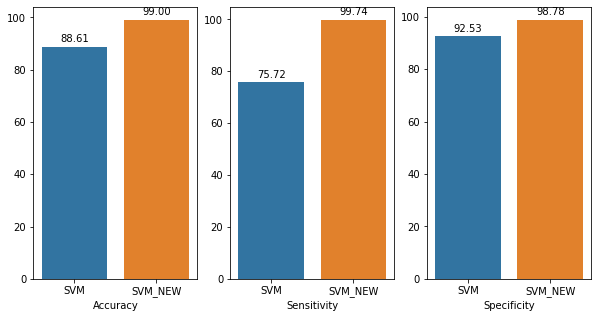

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))
x = ['SVM', 'SVM_NEW']

y = [P_SVC*100, P1_SVC*100]
plots = sns.barplot(x,y, ax = ax[0])
plots.set_xlabel('Accuracy')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
y = [sens*100, sens_new*100]
plots = sns.barplot(x,y, ax = ax[1])
plots.set_xlabel('Sensitivity')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
y = [spec*100, spec_new*100]
plots = sns.barplot(x,y, ax = ax[2])
plots.set_xlabel('Specificity')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
